In [1]:
import pandas as pd

In [346]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
PATH = '2017/Student-Feedback-Surveys-Superview.csv'

In [4]:
df = pd.read_csv(PATH)

In [311]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",1,3,Just right
1,36,Los Angeles,Apps,1,4,A little too fast
2,117,San Francisco,Games,1,4,Way too slow
3,253,NaN,NaN,2,4,A little too fast
4,350,New York City,"Apps, Explorer",1,4,Just right


## Rid our dataset of (3) invalid ratings

In [5]:
df = df[ df["Rating (Num)"] != '#ERROR!']
df = df[ df["Rating (Num)"] != '0']
df["Rating (Num)"] = df["Rating (Num)"].astype(int)

In [312]:
sorted(df["Rating (Num)"].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# How many more promoters are there than detractors across our 2017 data?

In [8]:
def count_promoters(df):
    return (df["Rating (Num)"] >= 9).sum()

num_of_promoters = count_promoters(df)
num_of_promoters

760

In [9]:
def count_passives(df):
    return (df["Rating (Num)"] >= 7).sum() - count_promoters(df)
num_of_passives = count_passives(df)
num_of_passives

569

In [10]:
def count_detractors(df):
    return (df["Rating (Num)"] <= 6).sum()
num_of_detractors = count_detractors(df)
num_of_detractors

119

In [11]:
total = num_of_detractors + num_of_passives + num_of_promoters
actual_total = len(df)
actual_total == total

True

In [12]:
def calculate_nps(promoters, passives, detractors):
     return (promoters - detractors) / (promoters + passives + detractors)

In [13]:
calculate_nps(num_of_promoters, num_of_passives, num_of_detractors) * 100

44.267955801104975

Text(0.5, 1.0, 'Freaquency of ratings from 1 - 10')

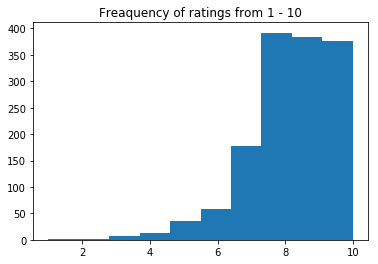

In [313]:
plt.hist(df["Rating (Num)"])
plt.title("Freaquency of ratings from 1 - 10")

In [15]:
def week_str_to_int(week):
    return int(week[-1])

week_arr = [week_str_to_int(week) for week in df['Week']]
df['Week'] = week_arr


# Which track boasts the best promoter-to-detractor ratio?

In [16]:
tracks = df['Track'].dropna().unique()
track_promoter_detractor_ratio = {}
for track in tracks:
    temp_df = df[df['Track'] == track]
    track_promoter_detractor_ratio[track] = count_promoters(temp_df) / (count_detractors(temp_df) + count_promoters(temp_df))
track_promoter_detractor_ratio

{'Apps, Explorer': 0.7913043478260869,
 'Apps': 0.8504854368932039,
 'Games': 0.9366197183098591,
 'VR': 0.9583333333333334,
 'Games, Explorer': 1.0}

# Does the student experience get better the longer that they are enrolled at the Summer Academy?


Text(0.5, 1.0, 'Average rating per week')

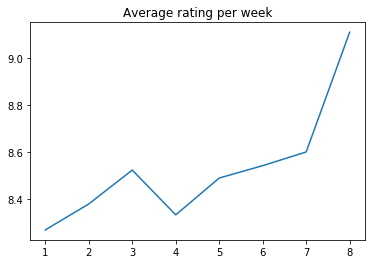

In [301]:
weeks_in_order = sorted(df['Week'].unique())
average_rating_by_week = [(df[df['Week'] == week]['Rating (Num)']).mean() for week in weeks_in_order]

plt.plot(weeks_in_order, average_rating_by_week)
plt.title("Average rating per week")

# Does student satisfaction vary by location?

Text(0.5, 1.0, 'Average rating based on location')

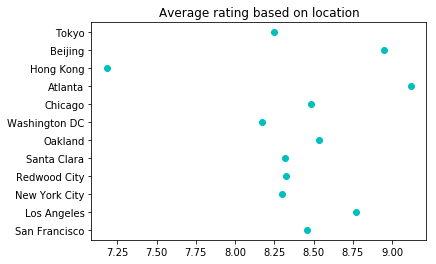

In [351]:
locations = df['Location'].dropna().unique()
average_rating_by_location = [(df[df['Location'] == location]['Rating (Num)']).mean() for location in locations]

plt.plot(average_rating_by_location, locations, 'ro', color='c')
plt.title("Average rating based on location")

Text(0.5, 1.0, 'NPS based on location')

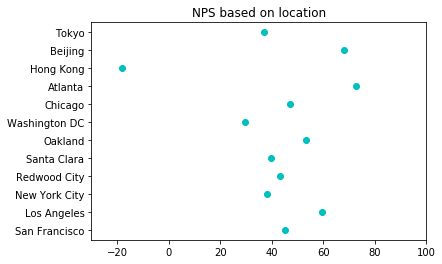

In [352]:
npses = []
locations = df['Location'].dropna().unique()
for location in locations:
    location_df = df[df['Location'] == location]
    npses.append(calc_df_nps(location_df))

plt.plot(npses, locations, 'ro', color = 'c')
plt.xlim(-30, 100)
plt.title("NPS based on location")

# What are things we could find here that could “help the business”?

Text(0.5, 1.0, 'Count of pacings')

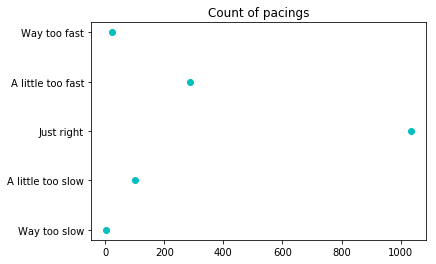

In [306]:
# pacings = sorted(df['Schedule Pacing'].dropna().unique())
pacings = ['Way too slow', 'A little too slow', 'Just right', 'A little too fast', 'Way too fast']
pacing_counts = [len(df[df['Schedule Pacing'] == pace]['Schedule Pacing']) for pace in pacings]
pacings_to_counts = list(zip(pacings, pacing_counts))
plt.plot(pacing_counts, pacings, 'ro', color='c')
plt.title("Count of pacings")

In [85]:
tracks = df['Track'].dropna().unique()

array(['Apps, Explorer', 'Apps', 'Games', 'VR', 'Games, Explorer'],
      dtype=object)

In [355]:
def plot_pace_to_track(track, clr):
    pacings = ['Way too slow', 'A little too slow', 'Just right', 'A little too fast', 'Way too fast']
    total_students_in_track = (df['Track'] == track).sum()
    pacing_counts = [(df[df['Track'] == track]['Schedule Pacing'] == pace).sum() / total_students_in_track for pace in pacings]
    plt.plot(pacing_counts, pacings, 'ro', color=clr, label =track)

Text(0.5, 1.0, 'Percentage of ratings on pacing by track')

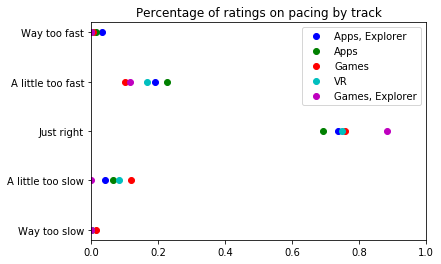

In [360]:
plot_pace_to_track('Apps, Explorer', 'b')
plot_pace_to_track('Apps', 'g')
plot_pace_to_track('Games', 'r')
plot_pace_to_track('VR', 'c')
plot_pace_to_track('Games, Explorer', 'm')
plt.legend(loc='upper right')
plt.xlim(0, 1)
plt.title("Percentage of ratings on pacing by track")

In [140]:
def calc_df_nps(df):
    detractors = count_detractors(df)
    promoters = count_promoters(df)
    passives = count_passives(df)
    return calculate_nps(promoters, passives, detractors) * 100

Text(0.5, 1.0, 'NPS by track')

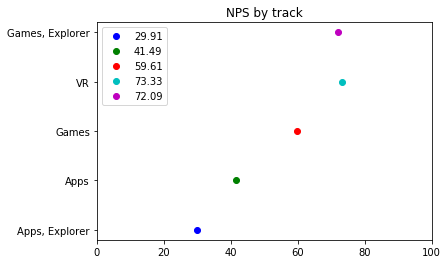

In [361]:
colors = ['b', 'g', 'r', 'c', 'm']

for i, track in enumerate(tracks):
    nps = calc_df_nps(df[df['Track'] == track])
    plt.plot(nps, track, 'ro', label=int(nps * 100)/100, color = colors[i])
plt.xlim(0, 100)
plt.legend(loc='upper left')
plt.title('NPS by track')

['Apps, Explorer' 'Apps' 'Games' 'VR' 'Games, Explorer']
nps [29.910714285714285, 41.49425287356322, 59.61538461538461, 73.33333333333333, 72.09302325581395]
rating [81.16071428571429, 83.66666666666667, 87.45192307692308, 91.83333333333334, 90.0]
dets [10.714285714285714, 8.85057471264368, 4.326923076923077, 3.3333333333333335, 0.0]
pros [40.625, 50.3448275862069, 63.942307692307686, 76.66666666666667, 72.09302325581395]
pass [48.660714285714285, 40.804597701149426, 31.73076923076923, 20.0, 27.906976744186046]


Text(0.5, 1.0, 'Track data')

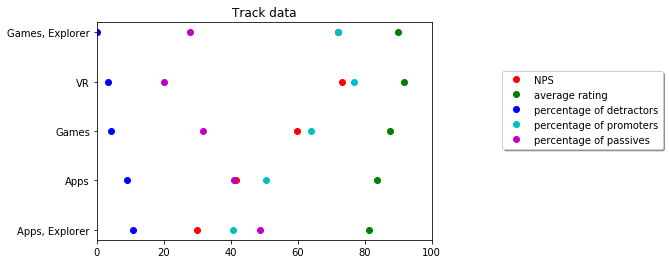

In [220]:
npses = []
avg_ratings = []
p_of_dets = []
p_of_pros = []
p_of_passes = []

for track in tracks:
    track_df = df[df['Track'] == track]
    npses.append(calc_df_nps(track_df))
    avg_ratings.append(track_df['Rating (Num)'].sum() / len(track_df) * 10)
    p_of_dets.append(count_detractors(track_df) / len(track_df) * 100)
    p_of_pros.append(count_promoters(track_df) / len(track_df) * 100)
    p_of_passes.append(count_passives(track_df) / len(track_df) * 100)

plt.plot(npses, tracks, 'ro', color = 'r', label='NPS')
plt.plot(avg_ratings, tracks, 'ro', color = 'g', label='average rating')
plt.plot(p_of_dets, tracks, 'ro', color = 'b', label='percentage of detractors')
plt.plot(p_of_pros, tracks, 'ro', color = 'c', label='percentage of promoters')
plt.plot(p_of_passes, tracks, 'ro', color = 'm', label='percentage of passives')

print(tracks)
print('nps',npses)
print('rating',avg_ratings)
print('dets',p_of_dets)
print('pros',p_of_pros)
print('pass', p_of_passes)

plt.xlim(0, 100)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.title("Track data")

### This graph is hard to read at first but here is a breif analysis
    - Every track has few detractors
        - The biggest impact on their NPS was the number of passives
        - The NPS is almost directly correlated to the percentage of promoters
                - In fact the NPS of the Game's explorer track is hidden underneath it's percentage of promoters
                  becuase it has no detractors        
    - The Apps, Explorer track is the only track with more passive ratings than promoting ratings
        - This is why its nps is so low

### Conclusions we can make:
    - The order of tracks by NPS are VR, Games-Explorer, Games, Apps, Apps-Explorer
    - Lets try to find out how pace plays into this

Text(0.5, 1.0, 'Hong kong pacing counts')

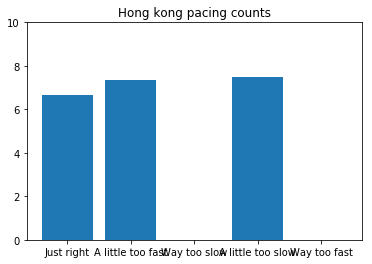

In [309]:
hong_kong_df = df[df['Location'] == 'Hong Kong']
pacings = df['Schedule Pacing'].dropna().unique()
avg_ratings = []

for pace in pacings:
    ratings_by_pace = hong_kong_df[hong_kong_df['Schedule Pacing'] == pace]['Rating (Num)']
    if not ratings_by_pace.empty:
        average_rating_by_pace = ratings_by_pace.sum() / len(ratings_by_pace)
    else:
        average_rating_by_pace = 0
    avg_ratings.append(average_rating_by_pace)

plt.bar(pacings, avg_ratings)
plt.ylim(0, 10)
plt.title("Hong kong pacing counts")

Text(0.5, 1.0, 'Amount of data recorded per week')

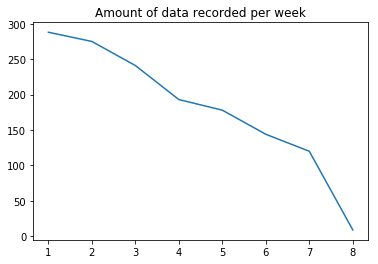

In [350]:
week_hist = Counter(df["Week"])
week_hist_keys = sorted(week_hist.keys())
week_hist_vals = [ week_hist[key] for key in week_hist_keys ]
plt.plot(week_hist_keys, week_hist_vals)
plt.title("Amount of data recorded per week")